## Import Statements

In [102]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

## Defining the function
Source: https://stackoverflow.com/questions/60160803/scipy-optimize-curve-fit-for-logistic-function

In [103]:
def logistic_function(x, a, b, c, d):
    return a / (1. + np.exp(-c * (x - d))) + b

## Reading in the data and cleaning it

In [104]:
with open('BirthsandDeathRates.csv', 'r') as f:
    lines = f.readlines()
birth_rates =[]
death_rates = []
for i in range(51, 73):
    #print(lines[i])
    birth_rates.append(float(lines[i].split(',')[3]))
    death_rates.append(float(lines[i].split(',')[2]))
years = list(range(2000, 2022))
for i in range(len(birth_rates)):
    birth_rates[i] = birth_rates[i]/1000000

for i in range(len(death_rates)):
    death_rates[i] = death_rates[i]/1000000

## Exploratory Data Analysis

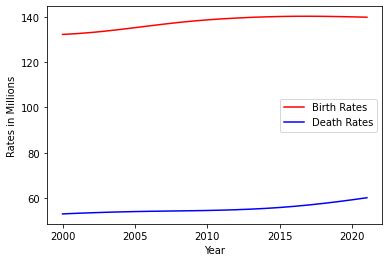

In [105]:
plt.plot(years, birth_rates, 'r', label = 'Birth Rates')
plt.plot(years, death_rates, 'b', label = 'Death Rates')
plt.xlabel('Year')
plt.ylabel('Rates in Millions')
plt.legend()

## Converting the arrays to numpy arrays and reshaping the x-axis as well as flattening the arrays into 1D as opposed to 2D

In [106]:
years = np.array(years).reshape(-1, 1).flatten()
birth_rates = np.array(birth_rates).flatten()
death_rates = np.array(death_rates).flatten()

## Creating the Model

In [107]:
paramsBirth, covarianceBirth = curve_fit(logistic_function, years, birth_rates, p0=[120, 2000, 3, 2010], maxfev=10000) # p0 is the initial guess for the parameters
r2 = r2_score(birth_rates, logistic_function(years, *paramsBirth)) # Calculating the R^2 value
print('R-Squared for births:', r2)


R-Squared for births: 0.9980445705799171


In [108]:
paramsDeath, covarianceDeath = curve_fit(logistic_function, years, death_rates, p0=[50, 2000, 5, 2010], maxfev=10000) # p0 is the initial guess for the parameters
r2 = r2_score(death_rates, logistic_function(years, *paramsDeath)) # Calculating the R^2 value
print('R-Squared for births:', r2)

R-Squared for births: 0.9922520509858695
